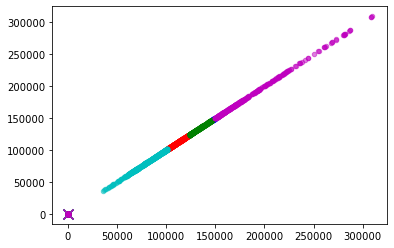

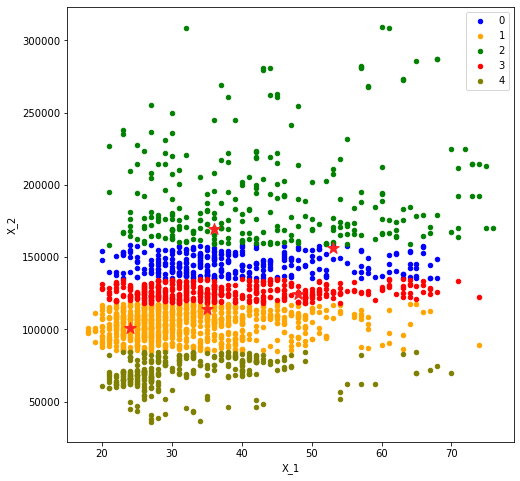

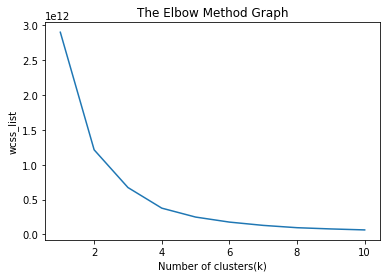

In [6]:
# -*- coding: utf-8 -*-
"""
Created on Sat Mar  5 18:23:09 2022

@author: Win-10
"""

import numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons
from sklearn.cluster import KMeans
csvdata = pd.read_csv("Customer data.csv")
[rows,columns]=np.shape(csvdata)
data=csvdata.iloc[:,1:columns]
customer_data=pd.DataFrame(data).to_numpy()
count=0
k=5
# Centroids=np.zeros([rows,columns])
# minimum_distancetortion_function=0
# Centroids=Kmeans.iloc[0:k,1:columns] 
# New_Centroids=pd.DataFrame(Centroids).to_numpy()
# Ecluedian_distance=np.zeros([rows,k])
# Users_Cluster=np.zeros(k)
# Sum_per_Clusters=np.zeros([k,columns-1])
# New_Centers=np.zeros([k,columns-1])
random_centroids=customer_data[np.random.choice(rows,k,replace=False)]
def GUC_Distance ( random_centroids, Data_points, Distance_Type ):
    Ecluedian_distance=np.zeros([rows,k])
    average_customers=np.zeros([rows,1])
    average_centers=np.zeros([k,1])
    updated_customer_data=np.zeros([rows,1])
    updated_centroids=np.zeros([k,1])
    difference_centroids=np.zeros([k,columns-1])#(x-xdash)
    difference_customer_data=np.zeros([rows,columns-1])
    numerator=np.zeros([rows,k])
    denominator=np.zeros([rows,k])
    if Distance_Type=='Eucledian distance':
        for i in range(k):    
            Ecluedian_distance[:,i] = ((customer_data-random_centroids[i])**2).sum(axis=1)
            Cluster_Distance=Ecluedian_distance
    else:
        average_customers=np.average(customer_data,axis=1)
        average_centers=np.average(random_centroids,axis=1)
        for b in range(rows):
           difference_customer_data[b]=customer_data[b]-average_customers[b] 
       
        for a in range(k):
           difference_centroids[a]=random_centroids[a]-average_centers[a]
        for m in range(rows):
           updated_customer_data[m]=((customer_data[m]-average_customers[m])**2).sum()
        for n in range(k):
           updated_centroids[n]=((random_centroids[n]-average_centers[n])**2).sum()
        for p in range(k):
           for o in range(rows): 
               numerator[o,p]=(difference_customer_data[o]* difference_centroids[p]).sum()
               denominator[o,p]=np.sqrt(updated_customer_data[o]*updated_centroids[p])
        Cluster_Distance=1-(numerator/denominator)
    return Cluster_Distance
# Result=GUC_Distance ( random_centroids, customer_data, 'p')

def GUC_Kmean ( customer_data,k,Distance_Type ):
    random_centroids=customer_data[np.random.choice(rows,k,replace=False)]
    Users_Cluster=np.zeros(k)
    Sum_per_Clusters=np.zeros([k,columns-1])
    New_Centers=np.zeros([k,columns-1])
    distortion_function=0
    distortion_function_temp=-1
    for z in range(100):
        random_centroids=customer_data[np.random.choice(rows,k,replace=False)]
        while True:
            Distance=GUC_Distance ( random_centroids, customer_data,'Eucledian distance')
            minimum_index=np.argmin(Distance,axis=1)
            minimum_distance=np.min(Distance,axis=1)
            Final_Cluster_Distance=minimum_distance
            for count in range(k):
                for x in range(rows):
                    if minimum_index[x]==count:
                        distortion_function=distortion_function+((((customer_data[x]-random_centroids[count])**2)).sum())
                        Users_Cluster[count]=Users_Cluster[count]+1
                        Sum_per_Clusters[count]=Sum_per_Clusters[count]+customer_data[x]
                New_Centers[count]=Sum_per_Clusters[count]/Users_Cluster[count]
                distortion_function=distortion_function/rows
            if distortion_function==distortion_function_temp:
                break
            else:
                distortion_function_temp=distortion_function
            if z==0:
                minimum_distance=distortion_function
            if distortion_function<minimum_distance:
                minimum_distance=distortion_function
                random_centroids=New_Centers
            # return [Final_Cluster_Distance, minimum_distancetortion_function, random_centroids,minimum_index ]
            return minimum_index
# o=GUC_Kmean ( customer_data,k,'Eucledian distance')

def GUC_Get_Users(random_centroids,customer_data):
    Distance=GUC_Distance ( random_centroids, customer_data,'Eucledian distance')
    minimum_index=np.argmin(Distance,axis=1)
    counter=0
    Users=np.zeros((rows,columns-1))
    while True:
        for p in range(rows):
            if(minimum_index[p]==counter):
                Users[p]=customer_data[p]
        counter=counter+1
        display(Users,counter-1)
        Users=np.zeros((rows,columns-1))
        if(counter==k):
            break
    return Users   
# def display(Users):
#     print('yes')
#     return'yes'
def display(X,km=[],num_clusters=random_centroids):
    color = 'brgcmyk' #List colors
    alpha = 0.5 #color obaque
    s = 20
    if num_clusters == 0:
        plt.scatter(X[:,0],X[:,1],c = color[0],alpha = alpha,s = s)
    else:
        for i in range(num_clusters):
            plt.scatter(X[km==i,:0],X[km==i,:1],c = color[i],alpha = alpha,s=s)
            plt.scatter(random_centroids[i,0],random_centroids[i,1],c = color[i], marker = 'x', s = 100)
            
def display(X,km=[],num_clusters=0):
    color = 'brgcmyk' #List colors
    alpha = 0.5 #color obaque
    s = 20
    if num_clusters == 0:
        plt.scatter(X[:,0],X[:,1],c = color[0],alpha = alpha,s = s)
    else:
        for i in range(num_clusters):
            plt.scatter(X[km==i],X[km==i],c = color[i],alpha = alpha,s=s)
            plt.scatter(random_centroids[i][0],random_centroids[i][1],c = color[i], marker = 'x', s = 100)
            
dist=GUC_Kmean( customer_data,k,'Eucledian distance')
# U=GUC_Get_Users(random_centroids,customer_data) 
d=display(customer_data,dist,num_clusters=k)

# (Final_D,Distortion)=GUC_Kmean(customer_data,k,'Eucledian distance')
# def elbow (customer_data,k):
#     # k=2
#     while True:
#         # (Dis,Least_Distortion)=KMeans(customer_data,k,'Eucledian distance')
#         Least_Distortion=GUC_Kmean(customer_data,k,'Eucledian distance')
#         if k==2:
#             Distortion_old=Least_Distortion
#         elif Least_Distortion==Distortion_old:
#             k=k-1
#             break
#         Distortion_old=Least_Distortion
#         k=k+1
#         return k
# New_K=elbow(customer_data,k)
   
   
   
m=GUC_Kmean(customer_data, k, 'Eucledian distance')
df = pd.DataFrame(dict(x=customer_data[:,2], y=customer_data[:,4], label=m.astype(int)))
colors = {0:'blue', 1:'orange', 2:'green',3:'red',4:'olive',5:'yellow',6:'pink'}
fig, ax = plt.subplots(figsize=(8, 8))
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
ax.scatter(random_centroids[:, 2],random_centroids[:, 4], marker='*', s=150, c='#ff2222')
plt.xlabel('X_1')
plt.ylabel('X_2')
plt.show()
   


wcss_list= []  #Initializing the list for the values of WCSS  
  
#Using for loop for iterations from 1 to 10.  
for i in range(1, 11):  
     kmeans = KMeans(n_clusters=i,init='k-means++', random_state= 42)  
     kmeans.fit(data)  
     wcss_list.append(kmeans.inertia_)  
plt.plot(range(1, 11), wcss_list)  
plt.title('The Elbow Method Graph')  
plt.xlabel('Number of clusters(k)')  
plt.ylabel('wcss_list')  
plt.show()  